![TENK Tech - Face ID - Capgemini](utils/materials/header.jpg "TENK Tech - Face ID - Capgemini")
# Velkommen til Capgeminis sesjon om maskinlæring og FaceID

Vi i Capgemini sin avdeling for innsikt og data jobber hver dag med å hjelpe selskaper og bedrifter med å hente ut mer informasjon og kunnskap fra den dataen de har slik at de kan ta bedre beslutninger, og automatisere, optimalisere og effektivesere prosesser.

I dag skal dere få bli litt bedre kjent med hvordan vi jobber med kunstig intelligens og maskinlæring. Vi skal innom temaer som:
* Metoder for hvordan man utvikler en maskinlærinsmodell
* Klargjøring av data
* Trening av modeller
* Testing av modeller

Vi håper dere finner dette spennende og at dere får lyst til å være med å utvikle morgendagens løsninger ved hjelp av kunstig intelligens og maskinlæring!

## Før vi kan sette i gang må vi sette opp kodemiljøet vi skal bruke

Følg stegene nedenfor så er vi straks klar til å starte!

<ol style="font-size:1.2em;">
    <li>Finn Runtime i menylinjen ovenfor</li>
    <img src="utils/materials/dropdown2.png" alt="Finn Runtime i menylinjen" width="400" />
    <li>Trykk på *Change runtime type*</li>
    <li>Velg GPU</li>
    <img src="utils/materials/gpu2.png" alt="Velg GPU" width="400"/>
    <li>Kjør koden nedenfor ved å klikke et eller annet sted i boksen og trykke på *Ctrl + Enter*</li>
    <ul>
        <li> Her vil det muligens dukke opp et <i>Warning</i> vindu som vist nedenfor. Trykk da på <b style="color:#4487f4;">Run anyway</b>.</li>
        <img style="margin-top:1em;" src="utils/materials/warning.png" alt="Warning vindu" width="550"/>
    </ul>
</ol>


In [1]:
# import os
# os.system("git clone https://github.com/SimeNor/tenk.git") ;
# from tenk.utils.init_setup import setup
# setup() ;
from utils.moduler import *

# La oss komme i gang!

---

Første steg ved utvikling av enhver maskinlæringsmodell er å..

# <img src="utils/materials/skaff_bilder.png" class="center" alt="Hente inn data" width="80" />1. Hente inn data

Det aller viktigste når man arbeider med maskinlæring er dataen. Første steg er derfor å skaffe mye god data vi kan trene modellen vår på.

I vårt FaceID eksempel er det et par ting vi må passe spesielt på. Bildene må blant annet være:
- Av samme størrelse
- Av ansiktene til forskjellig mennesker
- Sortert på en måte som gjør at vi vet hvilke bilder som er av forskjellige personer.

Å skaffe data er en av de mest tidkrevene delene ved maskinlæring så vi har gjort klar en mappe med bilder for dere.
Denne heter *bilder_kjendiser* som ligger under *tenk* mappen.

For å få opp filer og mapper. Trykk på knappen i menylinjen på venstre side som vist i bildet nedenfor.

<img style="margin-top:1em;" src="utils/materials/bar.png" alt="Warning vindu" width="50"/>

Finner du mappen?  

Tast inn mappenavnet nedenfor sånn at vi kan bruke bildene til å trene en maskinlæringsmodell senere.

In [ ]:
# Sett inn navnet til mappen med bilder av kjendiser
lokasjon_bilder = ''

# <img src="utils/materials/analyser_bilder.png" class="center" alt="Analyser dataen" width="80" />2. Analyser dataen
En annen viktig del når man skal utvikle en maskinlæringsmodell er å bli kjent med dataen.  

Ta gjerne en titt i mappen og se hva du finner.  
Ser du..
* Nummererte mapper med bilder av forskjellige kjendiser?
* Mange forskjellige bilder for hver kjendis?
* Kjenner du igjen noen kjendiser?

La oss vise noen bilder nedenfor slik at vi kan se om bildene ser korrekt ut.

In [ ]:
# La oss vise noen bilder fra mappen
vis_bilder(lokasjon_bilder, antall_bilder_totalt=5, antall_bilder_per_kjendis=1)

## Gjør dataen tilgjengelig for bruk
Nedenfor lar vi maskinen laste inn bildene slik at vi kan trene modellen på de.  
Legg merke til antall bilder, det burde være mer enn 20 000. Stemmer dette?

In [ ]:
# Klargjør dataen
datasett = last_inn_bilder(lokasjon_bilder)

# <img src="utils/materials/tren_modell.png" class="center" alt="Tren en modell" width="80" />3. Tren en modell
Med dataen klar kan vi nå begynne med treningen av modellen.  

Det finnes mange forskjellige modeller, og som alle oss her så er de mer eller mindre forskjellige. Noen er gode til en ting, mens andre er gode til noe helt annet.

Nedenfor har vi klargjort en modell som fungerer godt for vår FaceID eksempel. Last ned modellen ved å kjøre koden i boksen nedenfor.  
Dukket det opp en modell?

In [ ]:
modell = last_ned_modell()

Når vi skal trene en modell er det flere ting vi må bestemme. Valgene vi tar vil ofte påvirke hvor god modellen vår blir til å løse oppgaven sin. I vårt tilfelle er dette hvor god den er til å identifisere mennersker fra bilder av ansiktene deres.

Noen eksempler på ting som må bestemmes er følgende **parametre**:
* Treningsiterasjoner - Hvor mange ganger modellen skal få lov til å trene på dataen.
* Størrelse på treningsgrupper - Hvor mange bilder en modell skal få se før den kan lære noe fra observasjonene den gjorde.
* Læringsraten - Hvor mye modellen skal lære fra hver treningsgruppe av bilder.

I boksen nedenfor har vi satt et eksempel for slike verdier. Du skal senere få teste med dine egne verdier.

> **!Tips:**
> Sett tallene innenfor følgende områder:
> * Læringsraten ->  [0.0000001 , 0.01]
> * Treningsiterasjoner  ->  [3 , 12]
> * størrelse_treningsgrupper  ->  [8 , 128]


In [ ]:
læringsrate = 0.001
treningsiterasjoner = 1
størrelse_treningsgrupper = 64

## Dele opp dataen i trening- og testsett
For at vi skal kunne si om modellen har lært noe må vi dele opp dataen vår i et treningssett og et testsett.  

Under trening lærer modellen av eksemplene den ser fra treningsdatasettet. Når den har trent en stund kan vi se hvordan den gjør det på testsettet. Testsettet inneholder bilder som modellen ikke har sett før. På denne måten må modellen lære seg oppgaven den skal løse, og kan ikke bare pugge bildene den ser under trening. Det er litt som på skolen. Pugge fasiten på fjorårets prøve er sjeldent en god måte å øve til årets prøve.

Det er viktig å vise modellen så mye data som mulig for trening slik at den får trent godt. Samtidig er det viktig at testsettet ikke har for få bilder. Dersom det er få bilder i testsettet vet vi ikke om modellen har lært noe eller om den bare hadde flaks på de få bildene den ble testet på.

Her vil vi bruke 80% av bildene til trening av modellen og 20% til testing.

In [ ]:
andel_test = 0.2

trenings_data, test_data = del_opp_datasett(datasett, andel_test, størrelse_treningsgrupper)

## Tren modellen
Når vi nå har delt opp dataen kan vi trene vår første modell.
La oss trene modellen på treningssettet 1 gang og se hvordan den gjør det.

Ser du hvordan *treffsikkerheten* utvikler seg? Dette er hvor godt modellen gjør det på treningssettet.

In [ ]:
modell = tren_modell(
    modell=modell,
    data=trenings_data,
    læringsrate=læringsrate,
    treningsiterasjoner=treningsiterasjoner
    )

# <img src="utils/materials/test_modell.png" class="center" alt="Tren en modell" width="80" />4. Test modellen
Nå har vi trent en modellen på treningssettet 1 gang. La oss se hvordan den gjør det på testsettet.  
Ser det lovende ut?

In [ ]:
test_modell(modell, data=test_data)

del modell, datasett, trenings_data, test_data, læringsrate, treningsiterasjoner, størrelse_treningsgrupper

# <img src="utils/materials/videreutvikle.png" class="center" alt="Videreutvikling" width="80" />5. Videreutvikling - Konurranse 
Da har vi kommet til dagens utfordring!

Her skal vi se hva dere har lært, og se hvem som klarer å bestemme den beste modellen.

Oppgaven består av to steg:
<ol>
   <li>Sett opp alle stegene for å trene en modell i rett rekkefølge.</li>
   <ol>
      <li>Flytt boksene nedenfor i korrekt rekkefølge ved bruk av pilene funnet på øvre høyre hjørnet av boksen som vist i bildet under.</li>
      <img style="margin-top:1em;" src="utils/materials/arrows.png" alt="Warning vindu" width="300"/>
      <li> Kjør så boksene i kronologisk rekkefølge.</li>
   </ol>
   <li> Juster <u>parametrene</u> slik at du får best mulig <i>treffsikkerhet</i>.</li>
   <ul>
      <li><i>Treffsikkerhet går fra 0 til 1. 0 = 0% korrekt, 1 = 100% korrekt.</i></li>
      <li><b>Den med høyest treffsikkerhet vinner!</b></li>
   </ul>
</ol>

**Obs!** *Vi har lagt inn testing for hver treningsiterasjon sånn at dere kan se hvordan modellen gjør det underveis. Testresultatene kan leses under *Valid**

**Vinneren blir kåret på slutten av sesjonen!**

In [ ]:
# Tren modellen
modell = tren_modell(
    modell=modell,
    data=trenings_data,
    læringsrate=læringsrate,
    treningsiterasjoner=treningsiterasjoner,
    test_data=test_data
    )

In [ ]:
# Test modellen
test_modell(modell, data=test_data)

In [ ]:
# Del opp dataen i trening- og testsett
trenings_data, test_data = del_opp_datasett(datasett, andel_test, størrelse_treningsgrupper)

In [ ]:
# Last inn bilder
datasett = last_inn_bilder(lokasjon_bilder)

In [ ]:
# Klargjør modell
modell = last_ned_modell()

In [ ]:
# Sett parametrene
læringsrate = #Sett inn tall
treningsiterasjoner = #Sett inn tall
størrelse_treningsgrupper =  #Sett inn tall

# <img src="utils/materials/celeb.png" class="center" alt="Kjendis" width="80" />5. Bonus - Finn din kjendis!
Modellen identifiserer mennesker ved å sammenligne bilder av ansikter og si hvor sansynlig det er at disse bildene er av samme person.

La oss se om dette kan brukes til å finne den kjendisen som ligner mest på deg!

## Last opp bilde(r)
For at vi skal kunne finne den kjendisen som modellen mener ligner mest på deg må vi gi den et bilde av deg som vi kan bruke for sammenligning.  
Dersom du ønsker kan du laste opp et eller flere bilder i mappen *dine_opplastninger*. Disse vil bli gitt til modellen for sammenligning med alle bildene som ligger i mappen *bilder_kjendiser*.  

**Dette er selvsagt helt frivillig! Vi vil ikke lagre disse bildene noe sted i etterkant.**

Dersom du har lastet opp et eller flere bilder i mappen kan du kjøre koden i boksen under for å gjøre klar bildene for modellen. Som du kanskje husker fra tidligere så er det viktig at bildene er av samme størrelse og kun av ansiktet ditt. Første steget er defor å bruke en maskinlæringsmodell til å finne ansiktet ditt i bildet og klippe det ut til riktig størrelse.  

La oss hvordan de ble seende ut!

c:\Users\slarsen\Documents\Git\tenk\tenk_env\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Fant ansikt i bilde "20210716_154837.jpg"
Fant ansikt i bilde "20210727_095613.jpg"
Fant ansikt i bilde "20210727_110908.jpg"
Fant ansikt i bilde "20210727_110910.jpg"
Fant ansikt i bilde "20210731_145851.jpg"
Fant ansikt i bilde "20210731_145856.jpg"


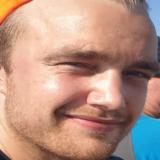

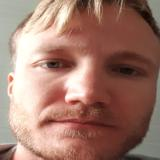

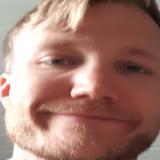

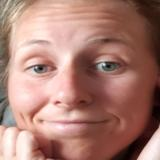

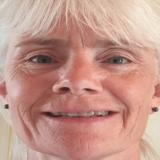

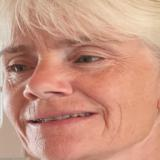

In [2]:
lokasjon_ansikter = finn_ansikter(lokasjon_bilder="dine_opplastninger")
vis_bilder(lokasjon_ansikter)

Nå som bildene er på rett format kan vi gjøre de tilgjengelige for modellen til å analysere. Kjør koden i boksen under for å laste inn bildene.

In [ ]:
dine_bilder = last_inn_bilder(lokasjon_ansikter)

## Beregn likhet
Nå som dataen er klar kan vi beregne likheten mellom ditt/dine bilder og bildene vi har av kjendisene.  
Er du spent?

**Obs!** Dette kan ta noen minutter.

In [ ]:
likhet = beregn_likhet(modell, kjendis_datasett=datasett, dine_bilder=dine_bilder)

## Vis resultatet
Vi har nå funnet den kjendisen som modellen mener ligner mest på deg.  
La oss se hvem den fant!

In [ ]:
vis_resultater(likhet)

## Dine vurderinger
Hvordan ble resultatet?  
Synes du dere ligner?  
Hva tenker du kan være utfordringen for slike systemer?  

Vi skal diskutere dette litt etterpå så gjør deg gjerne opp noen tanker!